In [37]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data = pd.read_csv('/Users/user/Downloads/vgsales.csv')

In [39]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [40]:
data.shape

(16598, 11)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [42]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [43]:
data['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

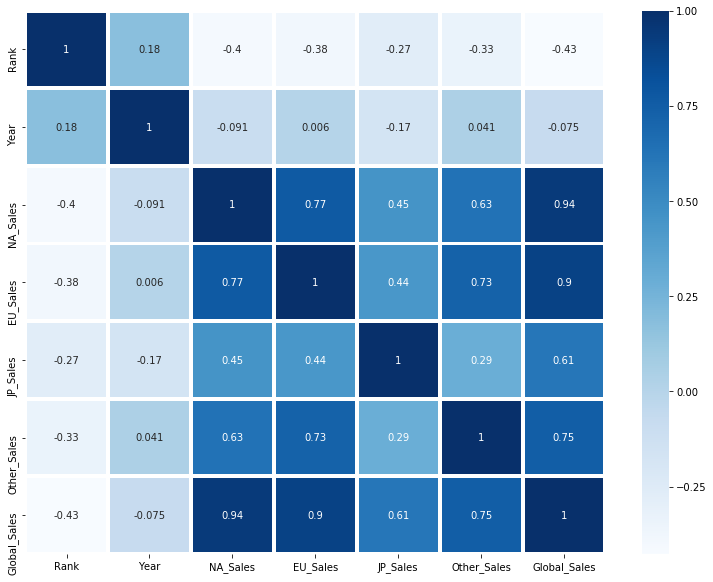

In [44]:
plt.figure(figsize=(13,10))
sns.heatmap(data.corr(), cmap = "Blues", annot=True, linewidth=3)

Из матрицы корреляции видно, что наиболее сильно коррелируют показатели продаж Северной Америки и Европы

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

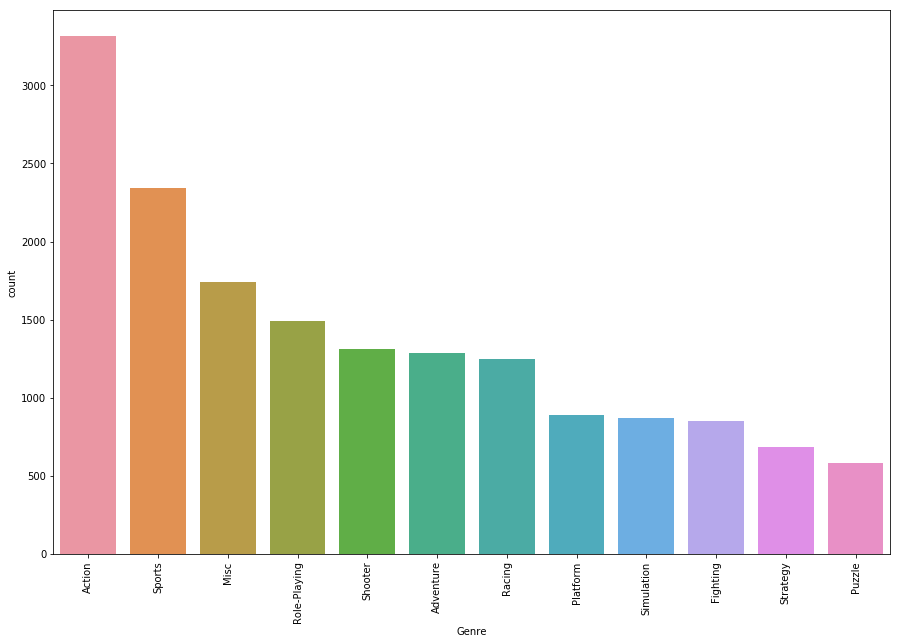

In [45]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90)

Из графика видно, что количество игр в жанре "Action" наибольшее, дальше идёт жанр "Sports" и так далее. 

In [46]:
data_by_year = data.groupby(by  = 'Year').sum()
data_by_year.drop(columns="Rank",inplace=True)
data_by_year

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980.0,10.59,0.67,0.00,0.12,11.38
1981.0,33.40,1.96,0.00,0.32,35.77
1982.0,26.92,1.65,0.00,0.31,28.86
1983.0,7.76,0.80,8.10,0.14,16.79
1984.0,33.28,2.10,14.27,0.70,50.36
1985.0,33.73,4.74,14.56,0.92,53.94
1986.0,12.50,2.84,19.81,1.93,37.07
1987.0,8.46,1.41,11.63,0.20,21.74
1988.0,23.87,6.59,15.76,0.99,47.22


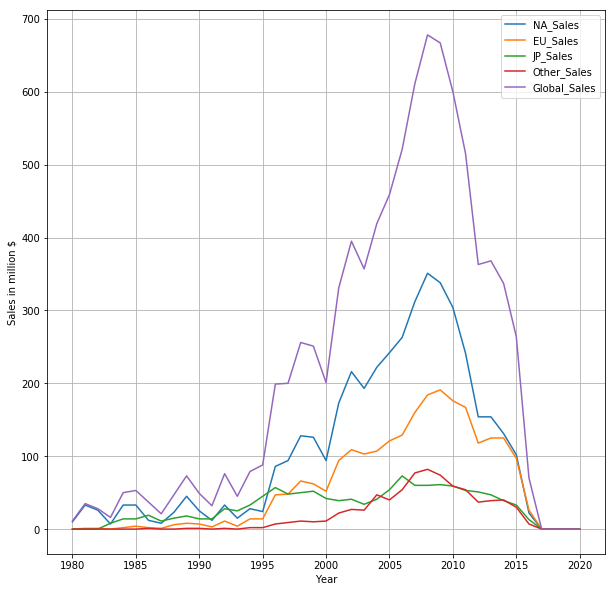

In [47]:
data_by_year=data_by_year.apply(lambda x : x.astype("int"))
data_by_year.plot.line(figsize=(10,10), grid="on");
plt.ylabel("Sales in million $");

Разбив продажи игр на разные года получим, что приблизительно в 2009 году произошёл скачок продаж и больше всех заработала на продаже Северная Америка. А вот Япония наоборот получила наименьший доход, даже по сравнению с другими странами. 

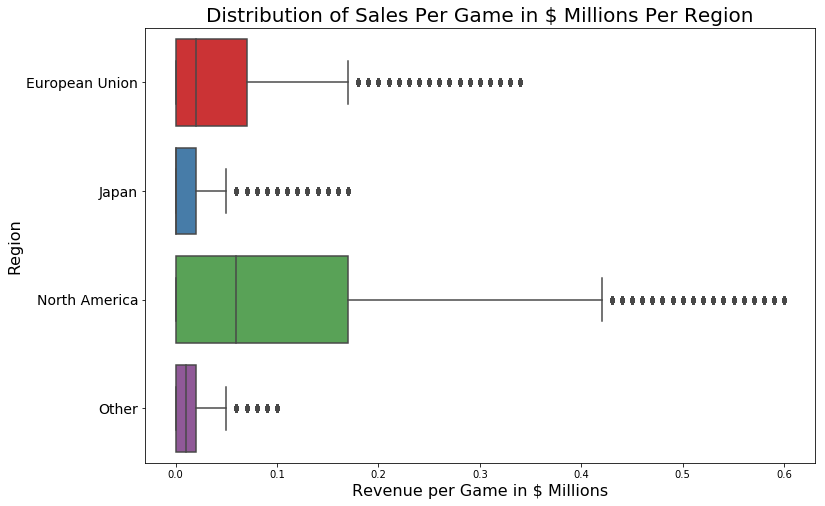

In [48]:
data = pd.DataFrame([data['EU_Sales'], data['JP_Sales'], data['NA_Sales'], data['Other_Sales']]).T
regions = ['European Union', 'Japan', 'North America', 'Other']
q = data.quantile(0.90)
data = data[data < q]
plt.figure(figsize=(12,8))

colors = sns.color_palette("Set1", len(data))
ax = sns.boxplot(data=data, orient='h', palette=colors)
ax.set_xlabel(xlabel='Revenue per Game in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Region', fontsize=16)
ax.set_title(label='Distribution of Sales Per Game in $ Millions Per Region', fontsize=20)
ax.set_yticklabels(labels=regions, fontsize=14)
plt.show()

Видим, что Северная Америка лидирует по продажам игр как в размахе, так и в значении медианы. 

In [49]:
top_sale_reg = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,1675.07
1,EU_Sales,742.82
2,JP_Sales,252.00
3,Other_Sales,246.07


In [50]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']

([<matplotlib.patches.Wedge at 0x1a1c2f4cc0>,
 [Text(-1.07005,-0.254938,'NA_Sales'),
  Text(1.04998,-0.327931,'EU_Sales'),
  Text(0.790409,0.765019,'JP_Sales'),
  Text(0.288218,1.06157,'Other_Sales')],
 [Text(-0.583664,-0.139057,'57.4%'),
  Text(0.572717,-0.178872,'25.5%'),
  Text(0.431132,0.417283,'8.6%'),
  Text(0.15721,0.579038,'8.4%')])

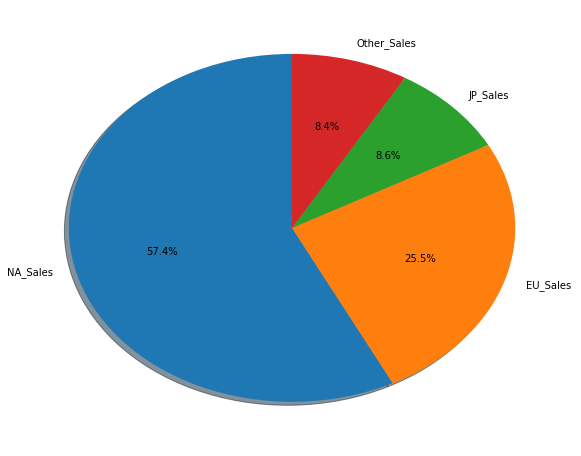

In [51]:
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

Аналогично видим, что Северная Америка имеет большую долю в продаже игр.

Исходя из проведённого анализа, получаем, что наибольшую прибыль от продажи видеоигр получают в Северной Америке. В 2009 году произошёл скачок продаж, в котором Япония не проявила себя. А также самым популярным жанром является "Action"